# Funciones de probabilidad

## Distribución uniforme

In [13]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [14]:
a = 1
b = 100
c = 120000
data = np.random.uniform(a,b,c)

(array([11996., 12071., 11962., 11910., 12090., 12138., 11939., 11948.,
        12015., 11931.]),
 array([ 1.00067521, 10.90051303, 20.80035085, 30.70018867, 40.60002648,
        50.4998643 , 60.39970212, 70.29953993, 80.19937775, 90.09921557,
        99.99905338]),
 <a list of 10 Patch objects>)

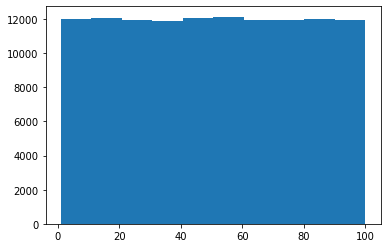

In [15]:
plt.hist(data)

### Distribución normal

In [16]:
data = np.random.randn(100000)

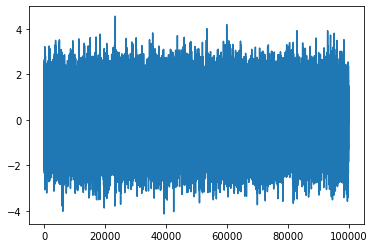

In [17]:
x = range(1,100001)
plt.plot(x,data)

(array([4.8000e+01, 7.3500e+02, 5.5630e+03, 1.9219e+04, 3.2802e+04,
        2.7468e+04, 1.1623e+04, 2.3150e+03, 2.1700e+02, 1.0000e+01]),
 array([-4.13806131, -3.26851328, -2.39896525, -1.52941722, -0.65986919,
         0.20967884,  1.07922687,  1.9487749 ,  2.81832292,  3.68787095,
         4.55741898]),
 <a list of 10 Patch objects>)

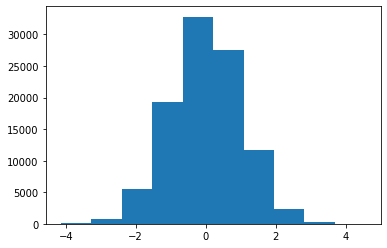

In [18]:
plt.hist(data)

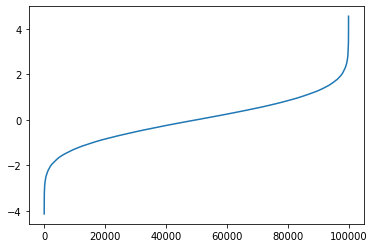

In [19]:
plt.plot(x,sorted(data))

(array([  4.,  13.,  49., 133., 243., 247., 197.,  80.,  31.,   3.]),
 array([-3.1512792 , -1.48921697,  0.17284526,  1.83490749,  3.49696971,
         5.15903194,  6.82109417,  8.4831564 , 10.14521863, 11.80728086,
        13.46934309]),
 <a list of 10 Patch objects>)

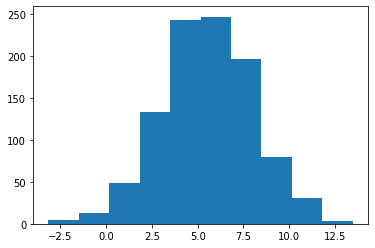

In [20]:
mu = 5.5
sd = 2.5
dataM = mu + sd*np.random.randn(1000)
plt.hist(dataM)

In [21]:
data2 = np.random.randn(2,4)
data2

array([[ 1.01513564, -0.62385207,  0.71564553,  0.78522268],
       [-0.18937062,  0.87257376,  0.35999753,  0.55564033]])

### La simulación de monte carlo

* Generaos 2 numeros aleatorios entre 0 y 1
* Calcularemos x*x + y*y
    * Si el valor es inferior a 1 estamos dentro
    * Si el valor es superior a 1 estamos fuera
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el total de intentos para obtener una aproximación de la probabilidad de caer dentro del circulo, usamos dicha probabilidad para aproximar el valor de π. 
* Repetiremos un numero la cantidad de veces necesaria hasta que se aproxime a π.

In [22]:
def calc_montecarlo(n,n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt((x[j]*x[j]) + (y[j]*y[j]))
            if z <=1:
                value += 1
        float_value = float(value)
        pi_value = float_value*4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    pi = pi_avg / n_exp
    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi,fig)

3.1402679999999967


(3.1402679999999967, [<matplotlib.lines.Line2D at 0x121e04190>])

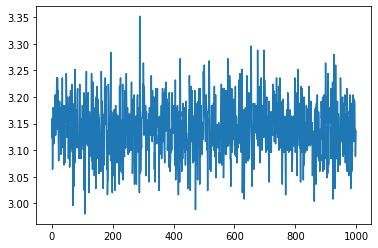

In [23]:
calc_montecarlo(1000,1000)

### Dummy Data sets

In [29]:
n = 1000000
dataD = pd.DataFrame({
    'A':np.random.randn(n),
    'B':1.5 + 2.5 * np.random.randn(n),
    'C':np.random.uniform(5,32,n)
}) 

In [30]:
dataD.head()

,A,B,C
0,0.238397,5.478468,26.663108
1,0.140162,2.490098,15.080272
2,0.661551,5.013148,29.987821
3,-1.042400,-1.354816,23.790936
4,0.688351,-0.634047,26.302581


In [31]:
dataD.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000490,1.496628,18.499712
std,1.000593,2.501928,7.794008
min,-4.794667,-11.639364,5.000036
25%,-0.672789,-0.188802,11.746557
50%,0.000817,1.496586,18.504202
75%,0.675191,3.180440,25.244541
max,4.755504,16.217025,31.999951


(array([6.00000e+01, 1.93800e+03, 2.49410e+04, 1.38162e+05, 3.26749e+05,
        3.33212e+05, 1.45494e+05, 2.72420e+04, 2.14300e+03, 5.90000e+01]),
 array([-4.79466746, -3.83965029, -2.88463311, -1.92961594, -0.97459877,
        -0.01958159,  0.93543558,  1.89045276,  2.84546993,  3.80048711,
         4.75550428]),
 <a list of 10 Patch objects>)

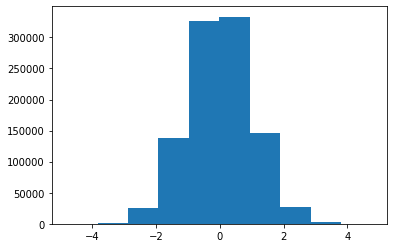

In [33]:
plt.hist(dataD['A'])

In [34]:
dataC = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [35]:
dataC.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [37]:
column_names = dataC.columns.values.tolist()

In [39]:
a = len(column_names)
a

21

In [41]:
new_data = pd.DataFrame({
    'Column name':column_names,
    'A':np.random.rand(a),
    'B':np.random.uniform(0,1,a)
})

In [43]:
new_data

,Column name,A,B
0,State,0.058884,0.043400
1,Account Length,0.987099,0.455213
2,Area Code,0.203420,0.030659
3,Phone,0.524433,0.721651
4,Int'l Plan,0.805491,0.124978
5,VMail Plan,0.231655,0.616216
6,VMail Message,0.409835,0.467483
7,Day Mins,0.857237,0.122667
8,Day Calls,0.408531,0.104587
9,Day Charge,0.466582,0.693715
